# <h1 style="font-size:4rem;color:orange;"><i>Arabidopsis thaliana</i> -  Single Plant Workflow</h1>

# Loading Python Libraries

In [1]:
# Matplotlib enables us to plot within the notebook, matplotlib is very powerful plotting library
%matplotlib widget
# Imports NumPy package into notebook, essential for scientific computing
import numpy as np
# Imports PlantCV into notebook so that we can conduct plant phenotyping analyses
from plantcv import plantcv as pcv
# Imports library to handle workflow inputs compatible with parallel workflow execution.
from plantcv.parallel import WorkflowInputs

In [2]:
# Print out the version of PlantCV being used by the Jupyter kernel
pcv.__version__

'0.0.0'

In [3]:
# Input/output options
args = WorkflowInputs(
    images=["Athaliana.png"],
    names="image1",
    result="Athaliana_results.csv",
    outdir=".",
    writeimg=True,
    debug="plot")

# Setting Your PlantCV Environment Parameters

**For more information on the class Params, check out**
https://plantcv.readthedocs.io/en/4.x/params/

In [4]:
# Set debug to the global parameter
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 100
# Now we set up our parameters for our PlantCV environment
pcv.params.text_size = 20
pcv.params.text_thickness = 20

Now, let's start working with some color images. We are going to begin by reading in a sample *A. thaliana* image.

# Reading Images into PlantCV
Inputs:
* filename = name of image file
* mode     = mode of imread ("native", "rgb", "rgba", "gray", "csv", "envi", "arcgis"). **Default is "native."**

Returns:
* img      = image object as numpy array
* path     = path to image file
* img_name = name of image file

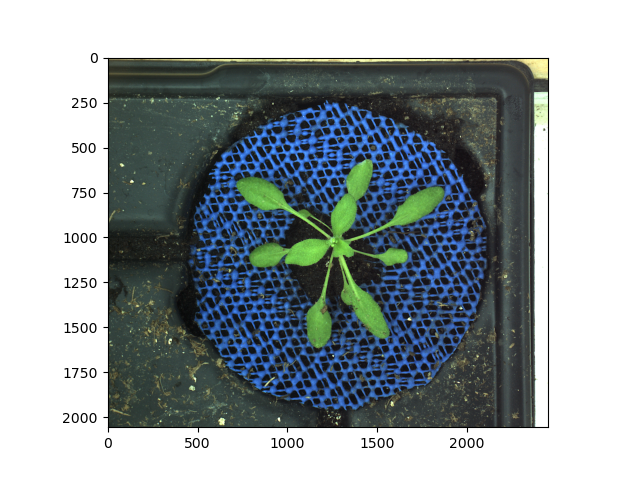

In [5]:
# Read in the sample image of Arabidopsis into PlantCV.
# Leave **mode** as Default - ("native").
img, path, img_name = pcv.readimage(filename=args.image1)

# Investigating the Dimensions of Your Image

In [ ]:
# Determine the shape and size of our RGB image below:
#The output will tell us (# of rows, # of columns, # of color channels)
img.shape

In [ ]:
#Determine the data type of the image below
img.dtype

In [ ]:
#Identify the minimum pixel value found in the image between all three channels
np.min(img)

In [ ]:
#Identify the maximum pixel value found in our image between all three channels
np.max(img)

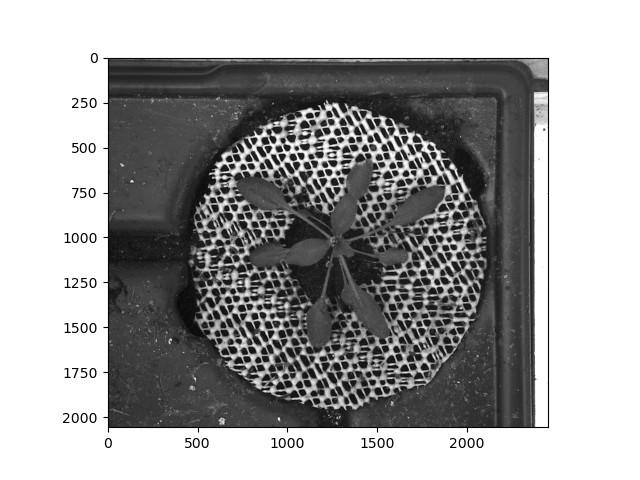

In [10]:
#We described earlier that each color channel is its own matrix
#To show this, we will pull out the green channel and it will show each is a grayscale channel with its own respective data
#We will use pcv.plot_image(img=img[:,:,1]) to extract the green channel data
#[:,:,0] -> Blue channel
#[:,:,1] -> Green channel
#[:,:,2] -> Red channel
pcv.plot_image(img=img[:, :, 0])

**What is happening in the other channels?**
* Change the 3rd element to 0 or 2 to see what the Blue and Red channels.

In [11]:
#Calculate the min, max, and mean values from the green channel to see how many pixels are represented in that channel
#We can check out the "pixel stats" for each channel to see where the most pixel intensity exists.
print(np.min(img[:,:,0]))
print(np.max(img[:,:,0]))
print(np.mean(img[:,:,0]))

0
255
83.48321964599691


# Investigating Colorspaces

For image analysis and visual perception of color properties, other color models such as [Hue, Saturation, and Value (HSV)](https://en.wikipedia.org/wiki/HSL_and_HSV) or [CIELAB (LAB)](https://en.wikipedia.org/wiki/CIELAB_color_space) have advantages over RGB.

In the next exercise we are going to visualize the color spaces available in PlantCV so we can label the plant material and distinguish the plant from the background.
We will use the function *pcv.visualize.colorspaces()* to help us see our image (img) in the various color models (HSV and LAB). We need to store the color space plot in a variable so just name the new variable *cs*. The last thing we will do is set original_img to **False** as we don't need to see our original image, we only care about the color space.

As you start typing out the method, be sure to use the TAB key to autocomplete the method so you don't end up with typographical errors. Once you complete typing *pcv.visualize.colorspaces()*, press SHIFT + TAB to view the helper to see how to set up the method.


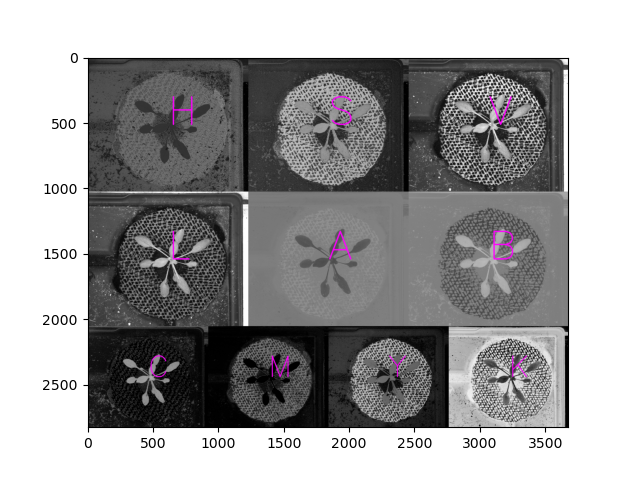

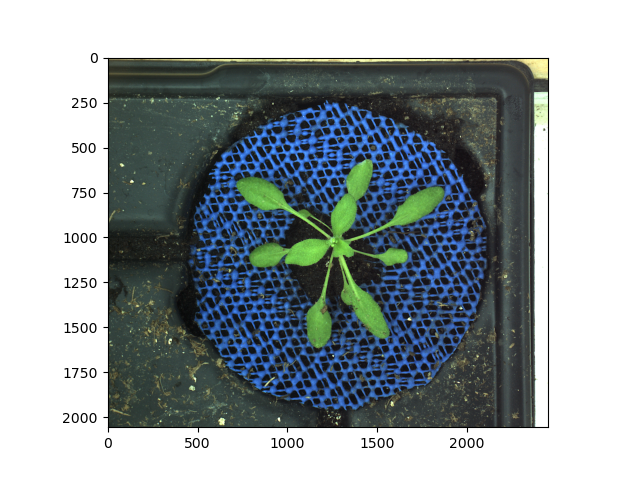

In [12]:
# Visualize component HSV and LAB color spaces
cs = pcv.visualize.colorspaces(rgb_img=img, original_img=False)
pcv.plot_image(img)

Let's take a moment to understand what each of the color models above are showing us. We will start with describing what HSV color spaces can tell us:
<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Hsl-hsv_models.svg/240px-Hsl-hsv_models.svg.png" />

* Hue - refers to the color of the pixel, the absolute representation of the color
* Saturation - refers to how "colorful" the pixel is (i.e., the difference between light green and forest green)
* Value - refers to how "white" the pixel is (0-255)

<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Visible_gamut_within_CIELAB_color_space_D65_whitepoint_mesh.png/240px-Visible_gamut_within_CIELAB_color_space_D65_whitepoint_mesh.png" />

* Lightness - similar to the Value color space, how much "white" or "brightness" is in the color
* A - This color space describes the green/red-magenta values
* B - This color spaces describes the blue/yellow values

We are visualizing our plant material in these spaces to maximize the differences between the "plant material" and the "background".
In our image, these differences will be more easily observed. When we use use top view images, looking at our images in these color spaces are very important as they will help us discern "plant material" from "soil media"

Use this color space that you determined to have the greatest contrast between plant and background, we are now going to convert our RGB image and cast it into grayscale but in the channel you chose.

(If you are unsure how to set up the method, press SHIFT + TAB to access the helper)

# Convert Image to Grayscale

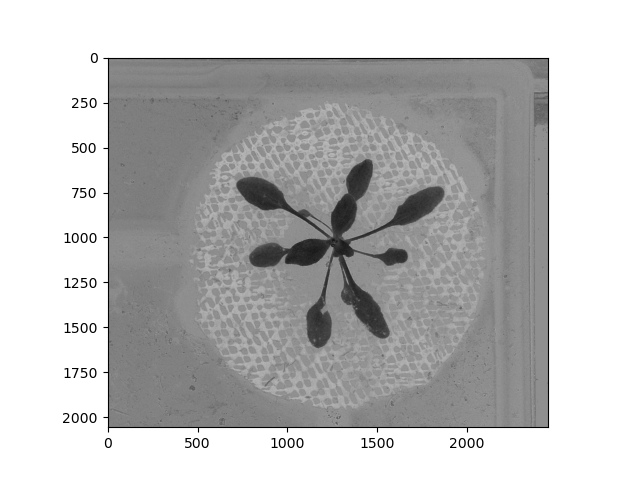

In [25]:
# The output of this method will be stored in the variable named *gray_img* since we are
# producing a grayscale image.
# The functions we will be using are *pcv.rgb2gray_hsv()* or *pcv.rgb2gray_lab()*
# Set the rgb_img to our *img* and define the channel with the color space you thought had
# the greatest contrast.

# Convert the RGB image into a grayscale image by choosing one of the HSV or LAB channels
gray_img = pcv.rgb2gray_lab(rgb_img=img, channel="a")

Now that we have our grayscale image, let's see which pixels refer to our plant and which are the background

## Visualizing pixel distribution in an image

Inputs:
* img            = an RGB or grayscale image to analyze
* mask           = binary mask, calculate histogram from masked area only (default=None)
* bins           = divide the data into n evenly spaced bins (default=100)
* lower_bound    = the lower bound of the bins (x-axis min value) (default=None)
* upper_bound    = the upper bound of the bins (x-axis max value) (default=None)
* title          = a custom title for the plot (default=None)
* hist_data      = return the frequency distribution data if True (default=False)

Returns:
* fig_hist       = histogram figure
* hist_df        = dataframe with histogram data, with columns "pixel intensity" and "proportion                    of pixels (%)"
*Look at your picture, what percentage of the picture is plant versus background? It will be helpful to keep this in mind when you look at the histogram output.*

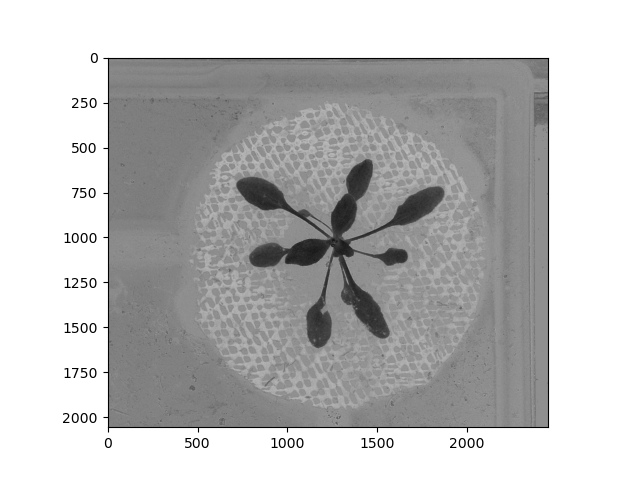

alt.Chart(...)

In [26]:
# Use *pcv.visualize.histogram()* to see the distribution of pixel values in the grayscale
# and store it in the variable *hist*.
# We will create **50 bins** to start with but play with the bins until you can see
# discrete peaks.
# Set *img* to *gray_img* since that is the image whose pixel distribution we wish to see.

# Visualize a histogram of the grayscale values to identify signal related to the plant
# vs the background.
pcv.plot_image(gray_img)
hist = pcv.visualize.histogram(img=gray_img, bins=30)

What does your chart look like? Compare your histogram with your neighbor's and see where the peaks are on the chart. As a refresher, histograms aggregate information into discrete bins that satisfy a range of values. The more values that fall within that "bin", the larger the peak on the chart.

In [17]:
print(input("Where is the largest peak located on the histogram?"))

Where is the largest peak located on the histogram? located on the left side near 0


located on the left side near 0


In [19]:
print(input("What part of our picture do you think is the big peak, is it the plant or the background?"))

What part of our picture do you think is the big peak, is it the plant or the background? background


background


*Discuss amongst yourselves what the other peaks on the histogram are referring to in our image and change the number of bins in the histogram to see how the pixel intensities are sorted. How did your finds compare with what you just found out?*

# Creating a Mask - Binary Thresholding

The next step is to create a binary mask that excludes pixel data from the background, but shows the pixel intensities from the plant material. To do this we will use the function *pcv.threshold.binary()* to set a binary threshold that labels the plant pixels white and the background as black.

Inputs:
* gray_img     = Grayscale image data
* threshold    = Threshold value (0-255)
* object_type  = "light" or "dark" (default: "light")
               - If object is lighter than the background then standard thresholding is done
               - If object is darker than the background then inverse thresholding is done

Returns:
* bin_img      = Thresholded, binary image

(Press SHIFT + TAB key to see the helper so we can set the inputs.)

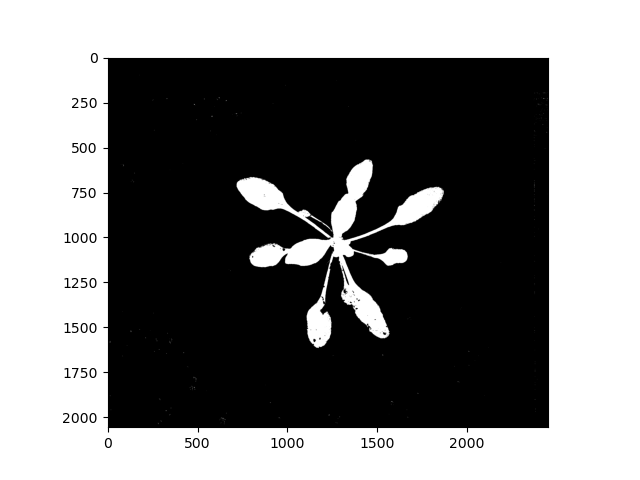

In [27]:
# We are going to store the information from this binary threshold in the variable bin_img.

# Use the histogram to set a binary threshold where the plant pixels will be labeled white
# and the background will be labeled black
man_bin_img = pcv.threshold.binary(gray_img=gray_img,
                                   threshold=100,
                                   object_type="dark")

Congratulations! You just set a manual threshold to exclude pixel data that you found does not represent the plant material.

PlantCV has the ability to automatically threshold using the function *pcv.threshold.otsu()* - our first step into using machine learning approaches.

(Use SHIFT + TAB to observe the helper and see how to set up this method, it isn't too much different than setting up a manual binary threshold.)

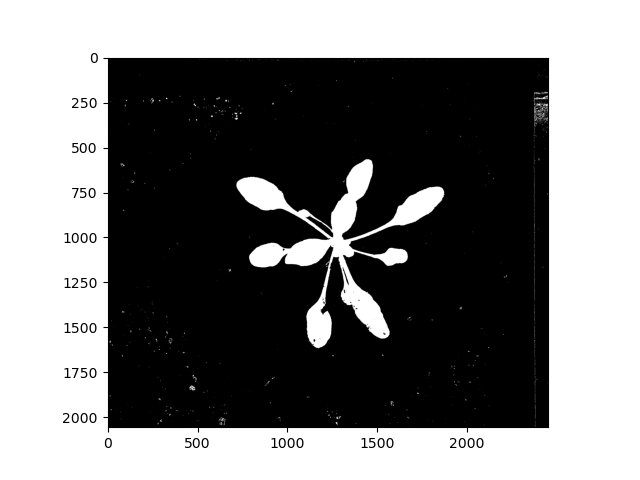

In [28]:
# Instead of setting a manual threshold, try an automatic threshold method such as Otsu
auto_bin_img = pcv.threshold.otsu(gray_img=gray_img,
                                  object_type="dark")

You might notice that some of the pixels from the background and color card made it into our Otsu-thresholded image, disregard these as they will not affect our analyses due on the design of our PlantCV workflow. What has happened is that the algorithm that Otsu's thresholding technique determined a pixel range that excluded the majority of the background, pot, and color card except for a few pixels (due to shading/color gradients).

Otsu's thresholding technique runs an algorithm with the following steps:
1. Process the input image
2. Obtain image histogram (distribution of pixels)
3. Compute the threshold value T
4. Replace image pixels into white in those regions, where saturation is greater than T and into the black in the opposite cases.

For more information on Otsu's thresholing technique, visit https://learnopencv.com/otsu-thresholding-with-opencv/

We need to look at our manually-thresholded and the Otsu-generated binary masks to determine which of these binary masks contain the most "plant." This will be the binary mask that we use to further filter our mask for overlaying on our image for precise measurement.

In the previous step, we created an ROI circle that encapsulated as much as of the plant as possible. Since we care about total plant area, we want the binary mask that will contain the most plant material (i.e., the Otsu-generated binary mask - *auto_bin_img*).

## Gathering Object Data

The function *pcv.visualize.obj_sizes()* will display all of the objects in the image using your binary mask and original image. Investigate the properties of this function and play around with the **num_objects** parameter to determine how many objects are in the image and the sizes of those objects.
Inputs:
* img          = RGB or grayscale image data
* mask         = Binary mask made from filtered binary mask
* num_objects  = Optional parameter to limit the number of objects that will get annotated

Returns:
* plotting_img = Plotting image with objects labeled by area

There were 0 objects not annotated.


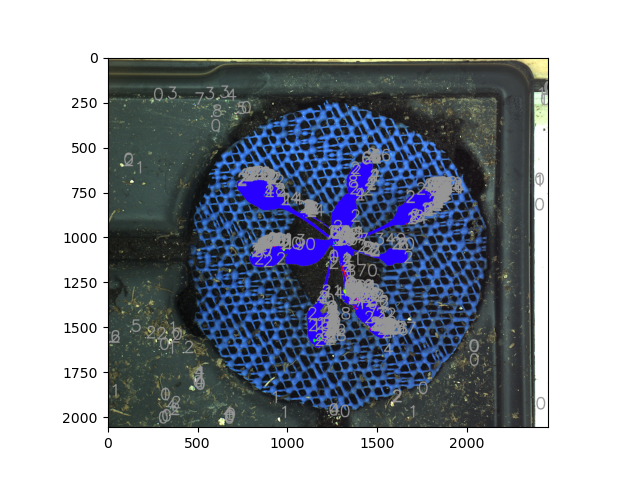

In [30]:
# Adjust the plot parameters so we can read the numbers.
pcv.params.text_size = 3
pcv.params.text_thickness = 5

# Set the number of objects to 10 so we can see the size of the largest objects
sizes = pcv.visualize.obj_sizes(img=img,
                                mask=man_bin_img,
                                num_objects=751)

Well, apparently our filtered_mask isn't in one piece and is actually made up of many objects.

## Reducing Image Noise

We can connect some of the objects together using *pcv.fill_holes()*. This function fills all of the holes and connects several objects together with white pixels. You will use this function if you notice that there are "holes" in your object of interest (you will know that there are holes in the object if you see pixel size values on your object of interest).

Inputs:
* bin_img      = Filtered binary image data

Returns:
* filtered_img = image with objects filled

C:\Users\pbhatt\AppData\Local\miniconda3\envs\plantcv\Lib\site-packages\plantcv\plantcv\plot_image.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


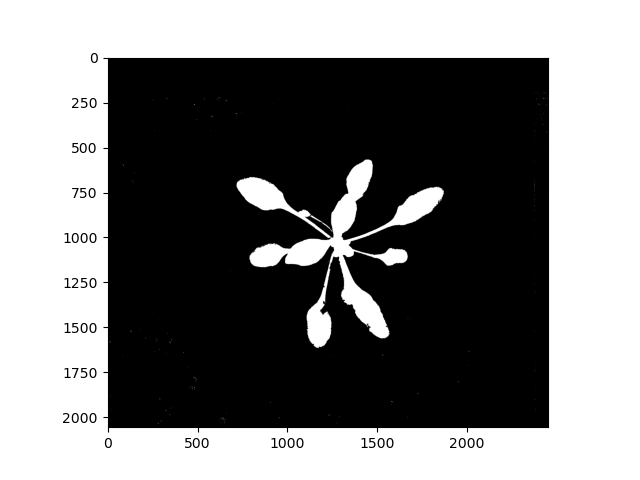

In [31]:
filled_mask = pcv.fill_holes(bin_img=man_bin_img)

Look at the image with mask overlay we produced, does it contain the aspects of the plant that we care about (i.e., as much "plant material" as possible)? If so, good! If not, then we need to become more discrete with our binary mask or we can filter the salt/noise so we get as much plant material as we can within our contoured layer.

Let's see how our flood fill worked using *pcv.visualize.obj_sizes()* again. We may not be able to completely connect all of the pixels, but we can try.

There were 0 objects not annotated.


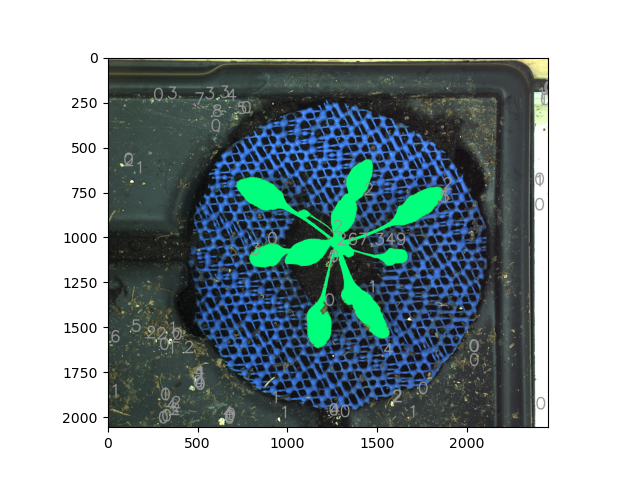

In [33]:
sizes = pcv.visualize.obj_sizes(img=img,
                                mask=filled_mask,
                                num_objects=377)

Looks as though there are still 47 more objects in this image, likely background.

## Fill
We can use the Fill function to fill objects below a certain pixel size that are found in the background of your image. This will help us create a single object for analysis by minimizing the external noise.

Inputs:
* bin_img      = Binary image data (use the
* size         = minimum object area size in pixels (integer)


Returns:
* filtered_img = image with objects filled

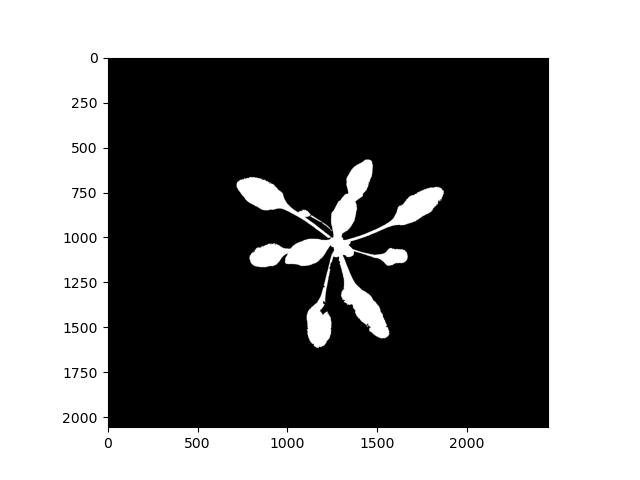

In [34]:
clean_mask = pcv.fill(bin_img=filled_mask,
                      size=20)

There were 0 objects not annotated.


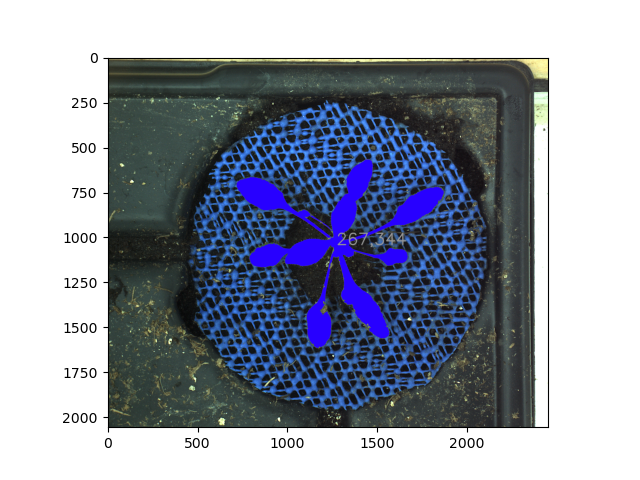

In [35]:
sizes = pcv.visualize.obj_sizes(img=img,
                                mask=clean_mask,
                                num_objects=1)

# Gathering Information From Your Image

We're almost there! Now we just need to analyze our plant and see what information we can pull out!

## Extract size data from your sample using *pcv.analyze.size()*
Inputs:
* img          = RGB image data for plotting
* labeled_mask = Labeled mask of objects (32-bit).
* n_labels     = Total number expected individual objects (default = 1).
* label        = Optional label parameter, modifies the variable name of observations recorded (default = "default").

Returns:
* analysis_image = Diagnostic image showing measurements.

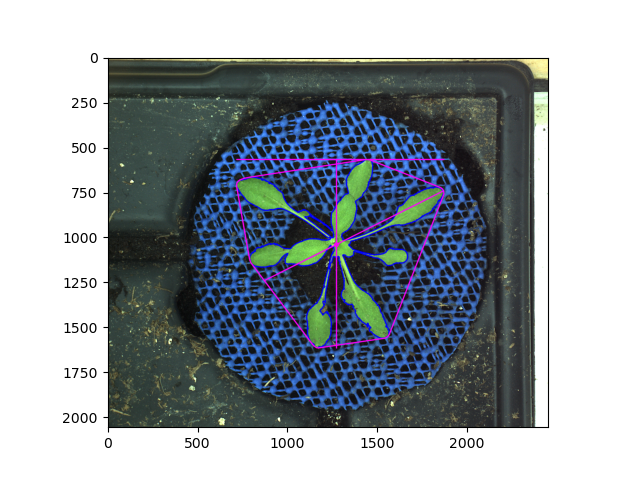

In [36]:
#shape_img = pcv.analyze.size(img=img, labeled_mask=labeled_mask, n_labels=num, label="plant1")
shape_img = pcv.analyze.size(img=img,
                             labeled_mask=clean_mask,
                             label="Athaliana")

## Extract color traits from your sample using *pcv.analyze.color()*

Inputs:

* img           = RGB image for debugging
* labeled_mask  = Grayscale mask with unique pixel value per object of interest
* n_labels      = Total number expected individual objects (default = 1).
* colorspaces   = 'all', 'rgb', 'lab', or 'hsv' (default = 'hsv')
* label         = Modifies the variable name of observations recorded (default = "default").

Returns:
* analysis_image  = histogram output


In [37]:
# Measure the color properties of the plant
color_hist = pcv.analyze.color(rgb_img=img,
                               labeled_mask=clean_mask,
                               colorspaces="hsv",
                               label="Athaliana")

alt.FacetChart(...)

# Color Wheel information
<p style="text-align:center;"><img src="https://www.sensationalcolor.com/wp-content/uploads/Color-Spectrum-Wheel-1-2048x2048.jpg" />
    Compare the information produced by *pcv.analyze.color* to see whether the colors in your original image are showing up on the histogram where there should be.

## Saving results
Analyzing a single plant is just the inital step of developing a workflow capable of performing high-throughput phenotyping. You will test your workflow on an increasing subset of image data to ensure its accuracy.
* *A recommended subsetted dataset schedule for training your algorithm is 1 image > 5 images > 20 images > 50 images*.
* Once you have developed sufficient accuracy with your workflow, then you will be ready to prepare a script for parallelization of the entirety of your image dataset for analysis.

In [38]:
# We will collect the data stored from *pcv.analyze.size()* and *pcv.analyze_color()* and save it as a Comma-Separated Values (CSV) files.
# The filename will be set to *plant1_result*.
pcv.outputs.save_results(args.result,
                         outformat="csv")

You can download the CSV file and view the attributes saved.